In [59]:
import pandas as pd

In [60]:
# from https://stackoverflow.com/questions/22987015/slice-pandas-dataframe-by-multiindex-level-or-sublevel
# some syntactic sugar to deal with inane pandas

def filter_by(df, constraints):
    """Filter MultiIndex by sublevels."""
    indexer = [constraints[name] if name in constraints else slice(None)
               for name in df.index.names]
    return df.loc[tuple(indexer)] if len(df.shape) == 1 else df.loc[tuple(indexer),]

pd.Series.filter_by = filter_by
pd.DataFrame.filter_by = filter_by

In [49]:
LCAtable = pd.read_csv('../addlsourcedata/LCA_factors_coded.csv', index_col=0)
LCAtable_index = pd.read_pickle('../addlsourcedata/LCA_factors_indexed.pd.pic.gz')
sht_table = pd.read_csv('../addlsourcedata/LCA_factors_original.csv')
sht_table.iloc[:,0] = sht_table.iloc[:,0].astype(str)
sht_table = sht_table.rename({'Unnamed: 0':None}, axis=1).set_index(None)

## load / run LCA


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# override to temporary location of rpy2 due to HPC downtime
# https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath
import sys
#sys.path.insert(0, '/tmp/eztemp/jupyter/lib/python3.6/site-packages')
import rpy2
import rpy2.robjects as robjects

r = robjects.r

from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

# import poLCA
poLCA = importr('poLCA')

### cached fitting logs

In [211]:
full_model = '''furthest, genomic, phyloP, phastCons, length, monophyletic, sigTPM,
               tau, dev_tau'''

red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
               tau, dev_tau'''

nclasses = 5
model = red_model

lca = r(f'''
    dat = read.table(file = 'LCA_factors_final.csv', sep=',', header = TRUE)

    f <- cbind({model})~1

    lc <- poLCA(f, dat, nclass={nclasses}, nrep=100, graphs=FALSE)
''')

#r(f'''
#    saveRDS(lc, file='./Dmel_MS_LCA_{nclasses}class_revised.RDS.bz2', compress='bzip2')
#    ''')

Model 1: llik = -6053.382 ... best llik = -6053.382
Model 2: llik = -6025.311 ... best llik = -6025.311
Model 3: llik = -6025.604 ... best llik = -6025.311
Model 4: llik = -6025.311 ... best llik = -6025.311
Model 5: llik = -6050.36 ... best llik = -6025.311
Model 6: llik = -6050.391 ... best llik = -6025.311
Model 7: llik = -6025.311 ... best llik = -6025.311
Model 8: llik = -6050.46 ... best llik = -6025.311
Model 9: llik = -6074.626 ... best llik = -6025.311
Model 10: llik = -6050.5 ... best llik = -6025.311
Model 11: llik = -6025.309 ... best llik = -6025.309
Model 12: llik = -6025.309 ... best llik = -6025.309
Model 13: llik = -6050.361 ... best llik = -6025.309
Model 14: llik = -6028.899 ... best llik = -6025.309
Model 15: llik = -6026.872 ... best llik = -6025.309
Model 16: llik = -6050.361 ... best llik = -6025.309
Model 17: llik = -6028.088 ... best llik = -6025.309
Model 18: llik = -6050.361 ... best llik = -6025.309
Model 19: llik = -6027.056 ... best llik = -6025.309
Model 

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f703b10e0c8> [RTYPES.NILSXP]

In [212]:
if False:
    full_model = '''furthest, genomic, phyloP, phastCons, length, monophyletic, sigTPM,
               tau, dev_tau'''

    red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    nclasses = 4
    model = red_model

    lca = r(f'''
        dat = read.table(file = 'LCA_factors_final.csv', sep=',', header = TRUE)

        f <- cbind({model})~1

        lc <- poLCA(f, dat, nclass={nclasses}, nrep=100, graphs=FALSE)
    ''')

    #r(f'''
    #    saveRDS(lc, file='./Dmel_MS_LCA_{nclasses}class.RDS.bz2', compress='bzip2')
    #    ''')

Model 1: llik = -6091.811 ... best llik = -6091.811
Model 2: llik = -6089.23 ... best llik = -6089.23
Model 3: llik = -6095.223 ... best llik = -6089.23
Model 4: llik = -6091.807 ... best llik = -6089.23
Model 5: llik = -6091.811 ... best llik = -6089.23
Model 6: llik = -6095.233 ... best llik = -6089.23
Model 7: llik = -6095.233 ... best llik = -6089.23
Model 8: llik = -6095.224 ... best llik = -6089.23
Model 9: llik = -6091.811 ... best llik = -6089.23
Model 10: llik = -6091.525 ... best llik = -6089.23
Model 11: llik = -6091.811 ... best llik = -6089.23
Model 12: llik = -6095.223 ... best llik = -6089.23
Model 13: llik = -6089.23 ... best llik = -6089.23
Model 14: llik = -6091.525 ... best llik = -6089.23
Model 15: llik = -6135.418 ... best llik = -6089.23
Model 16: llik = -6095.223 ... best llik = -6089.23
Model 17: llik = -6091.811 ... best llik = -6089.23
Model 18: llik = -6091.811 ... best llik = -6089.23
Model 19: llik = -6091.811 ... best llik = -6089.23
Model 20: llik = -6095

In [213]:
if False:
    full_model = '''furthest, genomic, phyloP, phastCons, length, monophyletic, sigTPM,
               tau, dev_tau'''

    red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    nclasses = 3
    model = red_model

    lca = r(f'''
        dat = read.table(file = 'LCA_factors_final.csv', sep=',', header = TRUE)

        f <- cbind({model})~1

        lc <- poLCA(f, dat, nclass={nclasses}, nrep=100, graphs=FALSE)
    ''')

    #r(f'''
    #    saveRDS(lc, file='./Dmel_MS_LCA_{nclasses}class.RDS.bz2', compress='bzip2')
    #    ''')

Model 1: llik = -6181.437 ... best llik = -6181.437
Model 2: llik = -6179.981 ... best llik = -6179.981
Model 3: llik = -6171.505 ... best llik = -6171.505
Model 4: llik = -6166.71 ... best llik = -6166.71
Model 5: llik = -6166.802 ... best llik = -6166.71
Model 6: llik = -6166.71 ... best llik = -6166.71
Model 7: llik = -6166.71 ... best llik = -6166.71
Model 8: llik = -6166.71 ... best llik = -6166.71
Model 9: llik = -6166.71 ... best llik = -6166.71
Model 10: llik = -6166.71 ... best llik = -6166.71
Model 11: llik = -6166.71 ... best llik = -6166.71
Model 12: llik = -6166.71 ... best llik = -6166.71
Model 13: llik = -6166.802 ... best llik = -6166.71
Model 14: llik = -6166.71 ... best llik = -6166.71
Model 15: llik = -6166.71 ... best llik = -6166.71
Model 16: llik = -6173.183 ... best llik = -6166.71
Model 17: llik = -6166.71 ... best llik = -6166.71
Model 18: llik = -6166.71 ... best llik = -6166.71
Model 19: llik = -6166.71 ... best llik = -6166.71
Model 20: llik = -6166.71 ... b

In [214]:
if False:
    full_model = '''furthest, genomic, phyloP, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    nclasses = 6
    model = red_model

    lca = r(f'''
        dat = read.table(file = 'LCA_factors_final.csv', sep=',', header = TRUE)

        f <- cbind({model})~1

        lc <- poLCA(f, dat, nclass={nclasses}, nrep=100, graphs=FALSE)
    ''')

    #r(f'''
    #    saveRDS(lc, file='./Dmel_MS_LCA_{nclasses}class.RDS.bz2', compress='bzip2')
    #    ''')

Model 1: llik = -5987.325 ... best llik = -5987.325
Model 2: llik = -5986.984 ... best llik = -5986.984
Model 3: llik = -5983.799 ... best llik = -5983.799
Model 4: llik = -5986.169 ... best llik = -5983.799
Model 5: llik = -5990.565 ... best llik = -5983.799
Model 6: llik = -5987.509 ... best llik = -5983.799
Model 7: llik = -6031.998 ... best llik = -5983.799
Model 8: llik = -5983.248 ... best llik = -5983.248
Model 9: llik = -5983.867 ... best llik = -5983.248
Model 10: llik = -5983.799 ... best llik = -5983.248
Model 11: llik = -5986.169 ... best llik = -5983.248
Model 12: llik = -5986.169 ... best llik = -5983.248
Model 13: llik = -5983.799 ... best llik = -5983.248
Model 14: llik = -5991.136 ... best llik = -5983.248
Model 15: llik = -5990.752 ... best llik = -5983.248
Model 16: llik = -5983.867 ... best llik = -5983.248
Model 17: llik = -5983.248 ... best llik = -5983.248
Model 18: llik = -5986.527 ... best llik = -5983.248
Model 19: llik = -5983.248 ... best llik = -5983.248
Mo

X^2(6): 3299.314 (Chi-square goodness of fit) 
 
ALERT: iterations finished, MAXIMUM LIKELIHOOD NOT FOUND 
 


In [215]:
if False:
    full_model = '''furthest, genomic, phyloP, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
                   tau, dev_tau'''

    nclasses = 2
    model = red_model

    lca = r(f'''
        dat = read.table(file = 'LCA_factors_final.csv', sep=',', header = TRUE)

        f <- cbind({model})~1

        lc <- poLCA(f, dat, nclass={nclasses}, nrep=100, graphs=FALSE)
    ''')

    #r(f'''
    #    saveRDS(lc, file='./Dmel_MS_LCA_{nclasses}class.RDS.bz2', compress='bzip2')
    #    ''')

Model 1: llik = -6270.595 ... best llik = -6270.595
Model 2: llik = -6270.367 ... best llik = -6270.367
Model 3: llik = -6270.366 ... best llik = -6270.366
Model 4: llik = -6270.366 ... best llik = -6270.366
Model 5: llik = -6270.595 ... best llik = -6270.366
Model 6: llik = -6270.367 ... best llik = -6270.366
Model 7: llik = -6270.366 ... best llik = -6270.366
Model 8: llik = -6270.366 ... best llik = -6270.366
Model 9: llik = -6270.366 ... best llik = -6270.366
Model 10: llik = -6270.367 ... best llik = -6270.366
Model 11: llik = -6270.595 ... best llik = -6270.366
Model 12: llik = -6270.367 ... best llik = -6270.366
Model 13: llik = -6270.366 ... best llik = -6270.366
Model 14: llik = -6270.366 ... best llik = -6270.366
Model 15: llik = -6270.367 ... best llik = -6270.366
Model 16: llik = -6270.367 ... best llik = -6270.366
Model 17: llik = -6270.595 ... best llik = -6270.366
Model 18: llik = -6270.366 ... best llik = -6270.366
Model 19: llik = -6270.367 ... best llik = -6270.366
Mo

### load final fitted 5 class model

In [5]:
# reorder classes for downstream use (don't save this as it's deterministic?)
nclasses = 5

vectordict = {5: 'c(5, 1, 2, 3, 4)',
              4: 'c(3, 1, 2, 4)', 
              3: 'c(2,1,3)'}
reorder_vector = vectordict[nclasses]

red_model = '''furthest, genomic, phastCons, length, monophyletic, sigTPM,
               tau, dev_tau'''
model = red_model

lca = r(f'''
    dat = read.table(file = '../addlsourcedata/LCA_factors_coded.csv', sep=',', header = TRUE)
    lc <- readRDS('../addlsourcedata/Dmel_MS_LCA_{nclasses}class_revised.RDS.bz2')
    probs.start <- lc$probs.start
    new.probs.start <- poLCA.reorder(probs.start, {reorder_vector})
    f <- cbind({model})~1
    lc <- poLCA(f, dat, nclass = {nclasses}, probs.start=new.probs.start)
''')

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$furthest
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)  Pr(8)  Pr(9) Pr(10)
class 1:  0.0244 0.0732 0.0488 0.0000 0.0000 0.1463 0.0976 0.1220 0.0244 0.2683
class 2:  0.5941 0.2598 0.1090 0.0371 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
class 3:  0.0000 0.0824 0.1044 0.1128 0.0219 0.3719 0.1659 0.0216 0.0113 0.0751
class 4:  0.0000 0.0049 0.0097 0.0004 0.0022 0.2040 0.2600 0.2150 0.0668 0.2367
class 5:  0.0000 0.0000 0.0000 0.0000 0.0121 0.0000 0.1092 0.1448 0.0388 0.3338
          Pr(11) Pr(12) Pr(13) Pr(14)
class 1:  0.0488 0.0488 0.0000 0.0976
class 2:  0.0000 0.0000 0.0000 0.0000
class 3:  0.0216 0.0000 0.0000 0.0110
class 4:  0.0003 0.0000 0.0000 0.0000
class 5:  0.1327 0.0993 0.0366 0.0928

$genomic
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4634 0.4878 0.0488 0.0000
class 2:  0.2588 0.2221 0.3334 0.1857
class 3:  0.3082 0.3236 0.3682 0.0000
class 4:  0.2789 0.3342 

## Figure 4 panels

In [9]:
def polarplot(df, categories, angle=0, **subplt_args):
    from math import pi as PI
    
    N = len(categories)

    angles = [n / float(N) * 2 * PI for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(polar=True, **subplt_args)

    # If you want the first axis to be on top:
    ax.set_theta_offset(PI / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.gca().xaxis.set_tick_params(pad=20)

    # Draw ylabels
    ax.set_rlabel_position(angle) # angle in degrees from straight up
    #plt.yticks([.25,.5,.75], [".25",".50",".75"], color="grey", size=7)
    #plt.ylim(0,.5)

    for i, values in df.iteritems():
        values=values.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"class {i+1}")
        ax.fill(angles, values, alpha=0.1)

    # Add legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.2))
    
    return plt.gca()
    #plt.show()

minspeciesorder = ['dm', 'droSec',
       'droEre', 'droSuz',
       'droBip', 
       'droRho', 'droFic',
       'droMir', 'droWil',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']

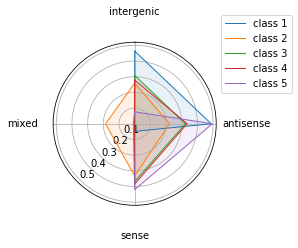

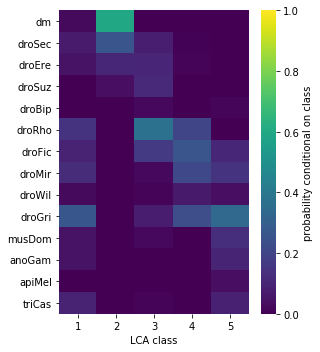

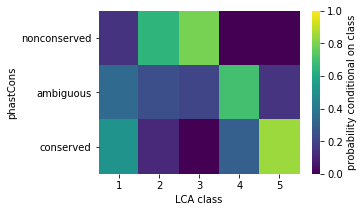

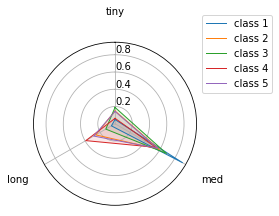

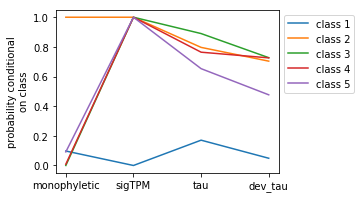

In [12]:
a = [pd.Series(m, name=n) for (n, m) in zip(lca.rx2('probs').names, lca.rx2('probs'))]
class_probs = [str(i+1)+" : "+str(round(p, 3)) for i, p in enumerate(lca.rx2('P'))]
#assert (nclasses) == (len(a[0]) / 2)

#plt.figure(figsize=(3,3), dpi=600)
plt.figure(figsize=(3,3))
locs = pd.DataFrame([a[1].values[i*nclasses:i*nclasses+nclasses] for i in range(0, 4)])
polarplot(locs, categories = ['intergenic', 'antisense', 'sense', 'mixed'],
         angle=225)
#plt.tight_layout()
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_loc_radar.pdf')
plt.show()

out_ages = pd.DataFrame([a[0].values[i*nclasses:i*nclasses+nclasses] for i in range(0, 14)])
out_ages.index = minspeciesorder
out_ages.columns = out_ages.columns.values+1 # shift from 0-indexed to 1-indexed

plt.figure(figsize=(4.5,5))
sns.heatmap(out_ages.iloc[:, ::1], cmap='viridis', vmin=0, vmax=1,
           cbar_kws={'label': 'probability conditional on class'})
plt.xlabel('LCA class')
plt.tight_layout()
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_age.pdf')
plt.show()

cons1 = pd.DataFrame([a[2].values[i*nclasses:i*nclasses+nclasses] for i in range(0, 3)])
cons1.index = ['nonconserved', 'ambiguous', 'conserved'] #LCA_phyloP_labels
cons1.columns = ['1', '2', '3', '4', '5'] #class_probs

#cons2 = pd.DataFrame([a[2].values[i*nclasses:(i+1)*nclasses] for i in range(0, 3)])
#cons2.index = LCA_phastCons_labels
#cons2.columns = class_probs
#
plt.figure(figsize=(4.5,3))
sns.heatmap(cons1.iloc[:, ::1], cmap='viridis', vmin=0, vmax=1,
           cbar_kws={'label': 'probability conditional on class'})
plt.ylabel(f'{a[2].name}')
#plt.tight_layout()
#plt.gca().yaxis.set_horizontalalignment('center')
#plt.gca().set_yticklabels(('asdlkfjsaldkjfalsdjf', 'blalalal', 'codsfjosaijfd'), 
#    rotation=90, fontsize="10", va="center")
plt.xlabel('LCA class')
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_phastcons.pdf')
plt.show()
#
#sns.heatmap(cons2, cmap='viridis', vmin=0, vmax=1)
#plt.ylabel(f'{a[3].name}')
#plt.show()

lth = pd.DataFrame([a[3].values[i*nclasses:i*nclasses+nclasses] for i in range(0, 3)])

plt.figure(figsize=(3,3))
polarplot(lth, ['tiny', 'med', 'long'])
#plt.tight_layout()
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_length.pdf')
plt.show()


plt.figure(figsize=(4,3))
for k, i in b.iteritems():
    plt.plot(i, label=k)
#plt.tight_layout()
plt.ylabel('probability conditional\non class')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1))
#plt.tight_layout()
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_binary_line.pdf')
plt.show()

## Forward analyses (Figure 5)

In [57]:
import numpy as np
import seaborn as sns
import scipy.stats as spstats

<Figure size 1800x1200 with 0 Axes>

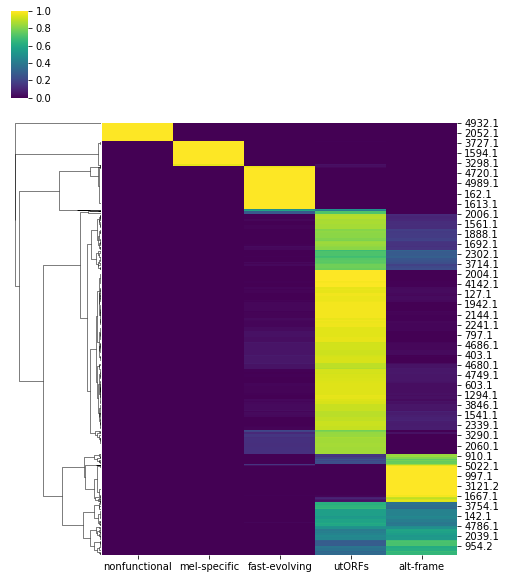

In [50]:
plt.figure(dpi=300)
sns.clustermap(pd.DataFrame(np.array(lca.rx2('posterior')), 
                            index=LCAtable_index.replace('NA', np.NaN).dropna().index,
                            columns=['nonfunctional', 'mel-specific', 'fast-evolving', 'utORFs', 'alt-frame']),
            cmap = 'viridis', vmin=0, vmax=1,
              figsize=(8,10),
              col_cluster=False,
               #row_colors=class_palette
              )
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_clustermap.eps')
plt.show()

In [51]:
post_classes = pd.DataFrame(np.array(lca.rx2('posterior')), columns=['nonfunctional', 'mel-specific', 'fast-evolving', 'utORFs', 'alt-frame'],
             index=LCAtable_index.replace('NA', np.NaN).dropna().index).idxmax(1)
post_data = pd.concat([sht_table, post_classes], axis=1, sort=True).rename({0:'class'},axis=1).set_index('class', append=True)

post_data.phastCons = post_data.phastCons.astype(float)
post_data.phyloP = post_data.phyloP.astype(float)
post_data.length = post_data.length.astype(int)
post_data.sigTPM = post_data.sigTPM.astype(float)
post_data.tau = post_data.tau.astype(float)
post_data.dev_tau = post_data.dev_tau.astype(float)

In [52]:
class_list = ['fast-evolving', 'alt-frame', 'utORFs', 'mel-specific', 'nonfunctional']

class_palette = dict(zip(class_list, sns.color_palette()))

from matplotlib import gridspec

In [227]:
if False:
    post_classes.to_pickle('../addlsourcedata/LCA_posterior_classes_revised.pandas.pic.gz')
    post_data.to_pickle('../addlsourcedata/LCA_posterior_data_revised.pandas.pic.gz')

### Figure 5 panels A-C

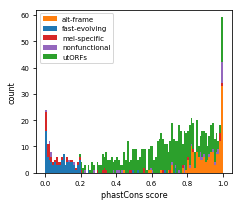

In [67]:
_ = []
for i in post_data.index.levels[1]:
    _.append(post_data.loc[pd.IndexSlice[:, i], pd.IndexSlice[:]].phastCons)

plt.figure(figsize=(3.5,3))
plt.hist(_,bins=100, stacked=True,
            label=post_data.index.levels[1],
        color=[class_palette[i] for i in post_data.index.levels[1]])
#plt.xlim(0,100)
plt.ylabel('count', fontsize=8)
plt.xlabel('phastCons score', fontsize=8)
plt.legend(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_phastcons_dist.pdf')
plt.show()

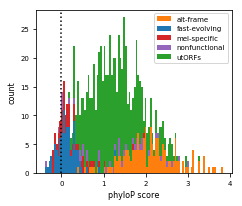

In [66]:
_ = []
for i in post_data.index.levels[1]:
    _.append(post_data.loc[pd.IndexSlice[:, i], pd.IndexSlice[:]].phyloP)

plt.figure(figsize=(3.5,3))
plt.hist(_,bins=100, stacked=True,
            label=post_data.index.levels[1],
        color=[class_palette[i] for i in post_data.index.levels[1]])
#plt.xlim(0,100)
plt.legend(fontsize=7)
plt.ylabel('count', fontsize=8)
plt.xlabel('phyloP score', fontsize=8)
plt.axvline(0, color='black', linestyle='dotted')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_phyloP_dist.pdf')
plt.show()

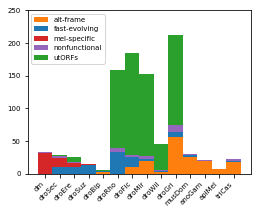

In [69]:
LCA_furthest_transform = {species: str(k+1) for k, species in enumerate(minspeciesorder)}

_ = []
_2 = post_data.dropna(subset=['furthest']).replace(LCA_furthest_transform).furthest.astype(int)
for i in post_data.index.levels[1]:
    _.append(_2.loc[pd.IndexSlice[:,i]])

plt.figure(figsize=(4,3))
plt.hist(_, stacked=True,
            label=post_data.index.levels[1],
        color=[class_palette[i] for i in post_data.index.levels[1]], bins=[i for i in range(1, 16)])
plt.sca(plt.gca())
#plt.ylim(0,100)
plt.gca().set_xticks([i+.5 for i in range(1,15)])
plt.gca().set_xticklabels(minspeciesorder, rotation=45, horizontalalignment='right',
                          fontsize=7)

_l, _ll = plt.yticks()
plt.yticks(_l, [str(int(i)) for i in _l], fontsize=7)

plt.ylim(0, 250)
plt.legend(fontsize=7) #, bbox_to_anchor=(1, 1))
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_fwd_age_dist.pdf')
plt.show()

### Figure 5 panels D-G

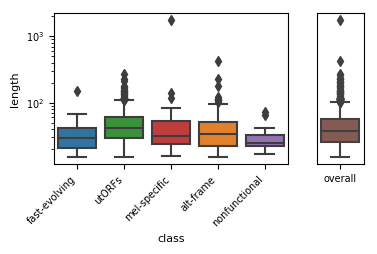

In [71]:
#sns.boxplot(data=post_data.reset_index(), x='class',y='length')
#plt.yscale('log')
#plt.show()

f = plt.figure(figsize=(4,2), dpi=100)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=post_data.reset_index(), x='class', y='length', palette = class_palette)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('length', fontsize=8)
plt.xlabel('class', fontsize=8)

#plt.ylabel('maximum TPM')
plt.yscale('log')
ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=post_data.reset_index(), y='length', color=sns.color_palette()[5])
plt.yscale('log')
ax1.set_ylim(ax0.get_ylim())
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)

#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_fwd_length.pdf')
plt.show()

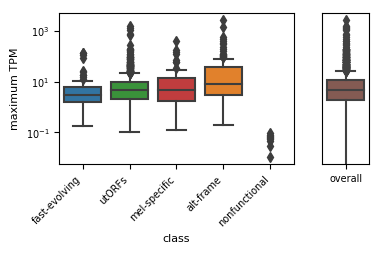

In [73]:
#sns.boxplot(data=post_data.reset_index(), x='class',y='sigTPM', )

#plt.show()

f = plt.figure(figsize=(4,2), dpi=100)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=post_data.reset_index(), x='class', y='sigTPM', palette = class_palette)
plt.ylabel('maximum TPM')
plt.yscale('log')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('maximum TPM', fontsize=8)
plt.xlabel('class', fontsize=8)

ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=post_data.reset_index(), y='sigTPM', color=sns.color_palette()[5])
plt.yscale('log')
ax1.set_ylim(ax0.get_ylim())
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)

#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_fwd_TPM.eps')
plt.show()

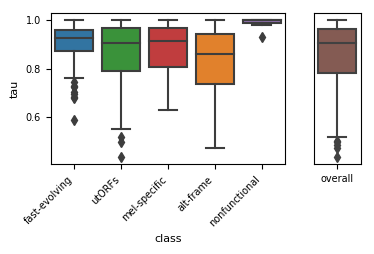

In [72]:
#sns.boxplot(data=post_data.reset_index(), x='class',y='tau')
##plt.yscale('log')
#plt.show()

f = plt.figure(figsize=(4,2), dpi=100)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=post_data.reset_index(), x='class', y='tau', palette = class_palette)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('tau', fontsize=8)
plt.xlabel('class', fontsize=8)

#plt.ylabel('maximum TPM')
#plt.yscale('log')
ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=post_data.reset_index(), y='tau', color=sns.color_palette()[5])
#plt.yscale('log')
ax1.set_ylim(ax0.get_ylim())
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)

#plt.tight_layout()
#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_fwd_tau.pdf')
plt.show()

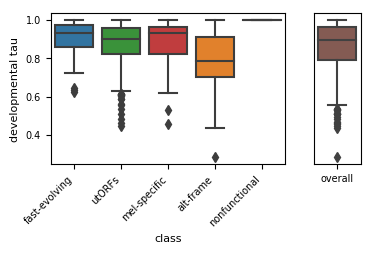

In [74]:
#sns.boxplot(data=post_data.reset_index(), x='class',y='dev_tau')
##plt.yscale('log')
#plt.show()

f = plt.figure(figsize=(4,2), dpi=100)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=post_data.reset_index(), x='class', y='dev_tau', palette = class_palette)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('developmental tau', fontsize=8)
plt.xlabel('class', fontsize=8)

ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=post_data.reset_index(), y='dev_tau', color=sns.color_palette()[5])
#plt.yscale('log')
ax1.set_ylim(ax0.get_ylim())
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)
plt.yticks(fontsize=7)
#plt.xlabel(plt.xlabel()[0], fontsize=8)
#plt.ylabel(fontsize=8)

#plt.savefig('/ru-auth/local/home/ezheng/results/Dmel_MSannot/figs/LCA_fwd_dev-tau.pdf')
plt.show()

## statistical testing

In [53]:
def stat_wrapper(test, subgroup, facet, transform=None, **kwargs):
    '''test is test function
    subgroup is class to test
    facet is column to use
    transform is if data needs transformation (e.g. np.log)
    other args via **kwargs'''
    classes = set(class_list)
    
    x1 = post_data.filter_by({'class':subgroup})[facet]
    x2 = post_data.filter_by({'class': classes - set([subgroup])})[facet]
    
    if transform:
        x1 = transform(x1)
        x2 = transform(x2)
        
    return test(x1, x2, **kwargs), x1.shape, x2.shape

In [54]:
def bm_wrapper(variable, transform=None):
    print(f'one-sided brunner-munzel test, LESS: {variable}')
    for i in class_list:
        res, a, b = stat_wrapper(test=spstats.brunnermunzel,
                subgroup=i,
                facet=variable,
                alternative='less',
                transform=transform
                )
        if res[1] < 0.001:
            sig = " * "
        else:
            sig = "   "
        if i in ['utORFs', 'alt-frame','mel-specific']: sep = '\t\t'
        else: sep = '\t'

        print(sig, end='')
        print(i, a[0],
             sep=sep, end='\t')
        print(b[0], res, sep='\t')
        
    print(f'one-sided brunner-munzel test, GREATER: {variable}')
    for i in class_list:
        res, a, b = stat_wrapper(test=spstats.brunnermunzel,
                subgroup=i,
                facet=variable,
                alternative='greater',
                transform=transform
                )
        if res[1] < 0.001:
            sig = " * "
        else:
            sig = "   "
        if i in ['utORFs', 'alt-frame','mel-specific']: sep = '\t\t'
        else: sep = '\t'

        print(sig, end='')
        print(i, a[0],
             sep=sep, end='\t')
        print(b[0], res, sep='\t')

In [75]:
bm_wrapper('length')

one-sided brunner-munzel test, LESS: length
 * fast-evolving	96	847	BrunnerMunzelResult(statistic=5.859870645764181, pvalue=1.855124442950995e-08)
   alt-frame		161	782	BrunnerMunzelResult(statistic=2.584410920235744, pvalue=0.005212236975340234)
   utORFs		591	352	BrunnerMunzelResult(statistic=-8.29616443784027, pvalue=0.9999999999999998)
   mel-specific		54	889	BrunnerMunzelResult(statistic=1.2632565524819392, pvalue=0.10575570222521313)
 * nonfunctional	41	902	BrunnerMunzelResult(statistic=7.056141913073411, pvalue=2.0130200839574286e-09)
one-sided brunner-munzel test, GREATER: length
   fast-evolving	96	847	BrunnerMunzelResult(statistic=5.859870645764181, pvalue=0.9999999814487556)
   alt-frame		161	782	BrunnerMunzelResult(statistic=2.584410920235744, pvalue=0.9947877630246598)
 * utORFs		591	352	BrunnerMunzelResult(statistic=-8.29616443784027, pvalue=2.768053576309296e-16)
   mel-specific		54	889	BrunnerMunzelResult(statistic=1.2632565524819392, pvalue=0.8942442977747869)
   nonfu

In [76]:
bm_wrapper('sigTPM', lambda x: np.log(x+.0001))

one-sided brunner-munzel test, LESS: sigTPM
 * fast-evolving	96	847	BrunnerMunzelResult(statistic=3.1596440347139487, pvalue=0.0009703404519346703)
   alt-frame		161	782	BrunnerMunzelResult(statistic=-5.788691768760031, pvalue=0.9999999872855204)
   utORFs		591	352	BrunnerMunzelResult(statistic=-1.4591896378211744, pvalue=0.9274524810819669)
   mel-specific		54	889	BrunnerMunzelResult(statistic=-0.5017875528786355, pvalue=0.691146918301158)
   nonfunctional	41	902	BrunnerMunzelResult(statistic=inf, pvalue=nan)
one-sided brunner-munzel test, GREATER: sigTPM
   fast-evolving	96	847	BrunnerMunzelResult(statistic=3.1596440347139487, pvalue=0.9990296595480653)
 * alt-frame		161	782	BrunnerMunzelResult(statistic=-5.788691768760031, pvalue=1.2714479614522394e-08)
   utORFs		591	352	BrunnerMunzelResult(statistic=-1.4591896378211744, pvalue=0.0725475189180331)
   mel-specific		54	889	BrunnerMunzelResult(statistic=-0.5017875528786355, pvalue=0.308853081698842)
   nonfunctional	41	902	BrunnerMunz

/ru-auth/local/home/ezheng/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:5366: RuntimeWarning: divide by zero encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)
/ru-auth/local/home/ezheng/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:5372: RuntimeWarning: invalid value encountered in double_scalars
  df = df_numer / df_denom


In [77]:
bm_wrapper('tau', lambda x: x.dropna())

one-sided brunner-munzel test, LESS: tau
   fast-evolving	93	777	BrunnerMunzelResult(statistic=-2.70252621185752, pvalue=0.9961304905329365)
 * alt-frame		158	712	BrunnerMunzelResult(statistic=3.729498461164363, pvalue=0.00012178456954092809)
   utORFs		560	310	BrunnerMunzelResult(statistic=-0.45879767572481994, pvalue=0.6767333782980534)
   mel-specific		52	818	BrunnerMunzelResult(statistic=-0.7971481330190386, pvalue=0.7856874385906893)
   nonfunctional	7	863	BrunnerMunzelResult(statistic=-7.56118075633552, pvalue=0.9998846687060681)
one-sided brunner-munzel test, GREATER: tau
   fast-evolving	93	777	BrunnerMunzelResult(statistic=-2.70252621185752, pvalue=0.0038695094670635507)
   alt-frame		158	712	BrunnerMunzelResult(statistic=3.729498461164363, pvalue=0.9998782154304591)
   utORFs		560	310	BrunnerMunzelResult(statistic=-0.45879767572481994, pvalue=0.32326662170194664)
   mel-specific		52	818	BrunnerMunzelResult(statistic=-0.7971481330190386, pvalue=0.21431256140931065)
 * nonfunct

In [78]:
bm_wrapper('dev_tau', lambda x: x.dropna())

one-sided brunner-munzel test, LESS: dev_tau
   fast-evolving	79	742	BrunnerMunzelResult(statistic=-3.2769745835490265, pvalue=0.9992810620004539)
 * alt-frame		134	687	BrunnerMunzelResult(statistic=6.150856629632534, pvalue=2.9816374924607203e-09)
   utORFs		556	265	BrunnerMunzelResult(statistic=-2.2616279370135124, pvalue=0.9878790374874027)
   mel-specific		50	771	BrunnerMunzelResult(statistic=-1.1483343943044004, pvalue=0.8721290645854524)
   nonfunctional	2	819	BrunnerMunzelResult(statistic=-83.49864223934395, pvalue=1.0)
one-sided brunner-munzel test, GREATER: dev_tau
 * fast-evolving	79	742	BrunnerMunzelResult(statistic=-3.2769745835490265, pvalue=0.0007189379995461309)
   alt-frame		134	687	BrunnerMunzelResult(statistic=6.150856629632534, pvalue=0.9999999970183625)
   utORFs		556	265	BrunnerMunzelResult(statistic=-2.2616279370135124, pvalue=0.012120962512597365)
   mel-specific		50	771	BrunnerMunzelResult(statistic=-1.1483343943044004, pvalue=0.12787093541454767)
 * nonfunction